# Effectiveness Of STD Drugs
## Problem Statement
![Problem Statement](problem-statement.png)

**Evaluation Algorithm**
**Root Mean Square Error (RMSE**)
normalization_constant 100000
Datasets
Training	download train.csv
Testing	download test.csv
Sample Submission	download sample.csv

# Importing required libraries and setup some variables

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab as plt # help to plot different graphs 

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10
#test.csv
#train.csv
#submission.csv

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


# Until fuction: line seperator
def print_dashes_and_ln():
    print('-'*100, '\n')
    
# Formatter to display all float format in 2 decimal format
#pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

### Reading training data with showing first 5 records

In [10]:
df_train = pd.read_csv('dataset/train.csv')
df_train_copy = df_train.copy()
df_train_copy.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


### Fetching last 5 records from training data

In [11]:
df_train.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428
32164,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,8.205393


### Checking datatypes of columns

In [12]:
df_train.dtypes

patient_id                      int64
name_of_drug                   object
use_case_for_drug              object
review_by_patient              object
effectiveness_rating            int64
drug_approved_by_UIC           object
number_of_times_prescribed      int64
base_score                    float64
dtype: object

### Get some basic information of the DataFrame:

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
use_case_for_drug             32165 non-null object
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null object
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


There are not any missing values because each column consists of 32165 rows.

Converting column which are in date format but is of other datatype. 

In [14]:
df_train['drug_approved_by_UIC'] =  pd.to_datetime(df_train['drug_approved_by_UIC'], infer_datetime_format=True)
#df_train.info()
df_train['day'] = df_train['drug_approved_by_UIC'].dt.day
df_train['year'] = df_train['drug_approved_by_UIC'].dt.year
df_train['month'] = df_train['drug_approved_by_UIC'].dt.month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
use_case_for_drug             32165 non-null object
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null datetime64[ns]
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 2.0+ MB


In [16]:
from textblob import TextBlob
from tqdm import tqdm
reviews = df_all['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
df_all["Predict_Sentiment"] = Predict_Sentiment
df_all.head()


df_train['review_by_patient'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["rating"])

In [ ]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["sentiment"])

In [7]:
#Delete serial number because that is not need for serial number and telephone
del df_train['use_case_for_drug']
del df_train['review_by_patient']

In [132]:
# getting total number of rows and column in the dataframe
def shape_of_dataframe(df_train):
    print(f" Shape of the dataframe = {df_train.shape}"); print_dashes_and_ln();
    totalrows=df_train.shape[0]
    print(f" Total number of rows in the dataset =  {totalrows}"); print_dashes_and_ln();
shape_of_dataframe(df_train)

 Shape of the dataframe = (32165, 6)
---------------------------------------------------------------------------------------------------- 

 Total number of rows in the dataset =  32165
---------------------------------------------------------------------------------------------------- 



Let's plots some basic figure to get basic idea of data.

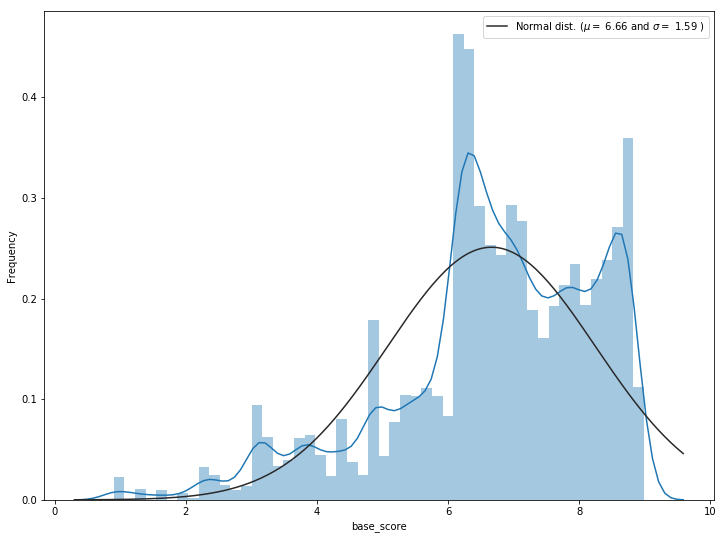

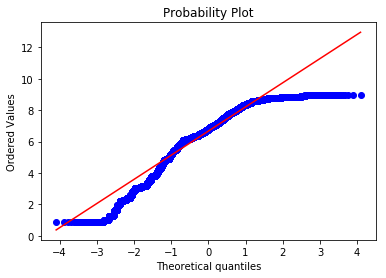

In [133]:
plt.subplots(figsize=(12,9))
sns.distplot(df_train['base_score'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train['base_score'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train['base_score'], plot=plt)
plt.show()

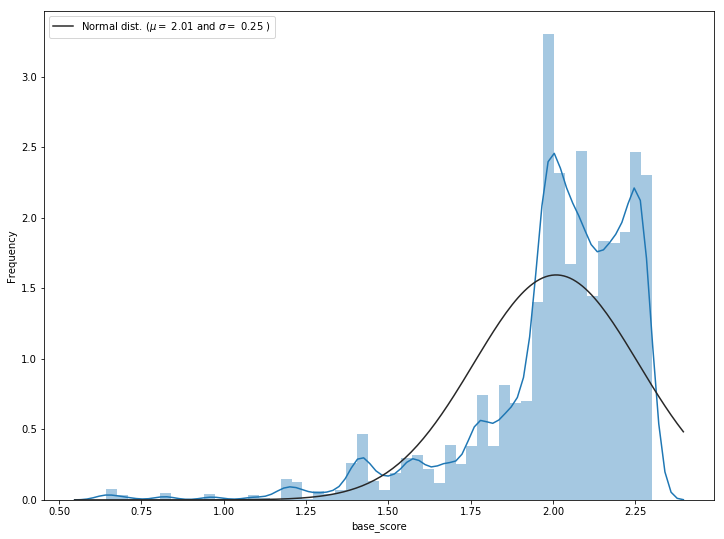

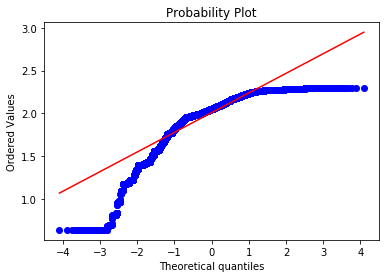

In [134]:
#we use log function which is in numpy
df_train['base_score'] = np.log1p(df_train['base_score'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(df_train['base_score'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train['base_score'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train['base_score'], plot=plt)
plt.show()


#Let's check if the data set has any missing values. 

In [135]:
# Columns by Data Type
non_numeric_columns = df_train.select_dtypes(['object']).columns
numeric_columns = df_train.select_dtypes(['number']).columns
print(f" Non Numerical Columns of the dataframe = {non_numeric_columns}"); print_dashes_and_ln();
print(f" Numerical Columns of the dataframe = {numeric_columns}"); print_dashes_and_ln();

 Non Numerical Columns of the dataframe = Index(['name_of_drug'], dtype='object')
---------------------------------------------------------------------------------------------------- 

 Numerical Columns of the dataframe = Index(['patient_id', 'effectiveness_rating', 'number_of_times_prescribed',
       'base_score'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 



Now, there is no any missing values. Encoding str to int


In [136]:
cols = ('name_of_drug')
df_train['name_of_drug'].unique().size

2220

In [137]:
#from sklearn.preprocessing import LabelEncoder
#for c in cols:
    #lbl = LabelEncoder() 
    #lbl.fit(list(df_train[c].values)) 
    #df_train[c] = lbl.transform(list(df_train[c].values))

In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 6 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null datetime64[ns]
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.5+ MB


Change data type from float to int 

In [139]:
#df_train['Saving Account'] = df_train['Saving Account'].astype(int)

In [140]:
#df_train['investment'] = df_train['investment'] * 10
#df_train['investment'] = df_train['investment'].astype(int)

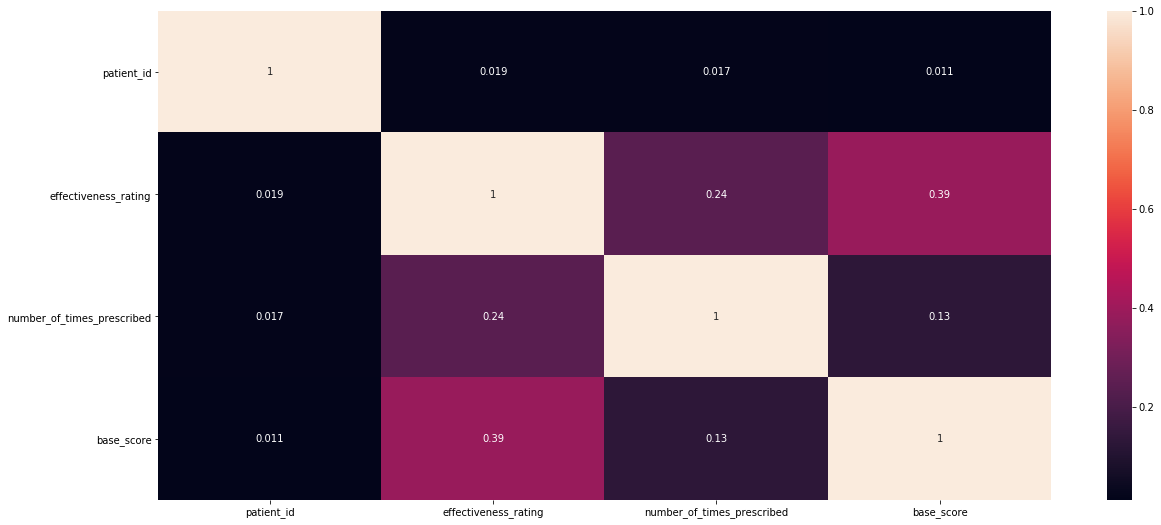

In [141]:


#Coralation plot
corr = df_train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)




Top 10% Corralation train attributes with credit amount

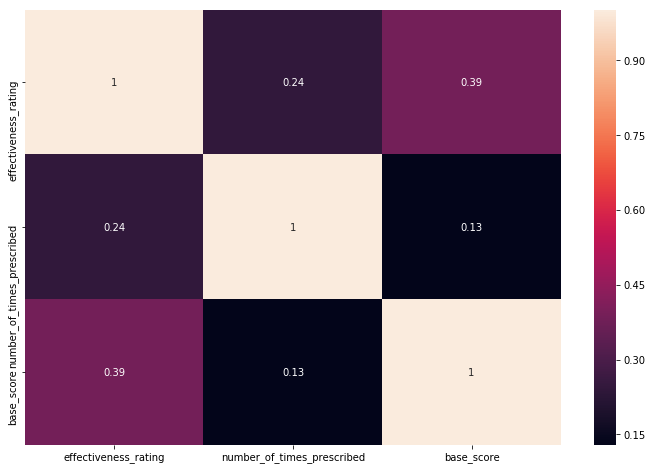

In [142]:
top_feature = corr.index[abs(corr['base_score']>0.1)]
plt.subplots(figsize=(12, 8))
top_corr = df_train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here duration_month is highly correlated with target feature of credit amount by 64%.
So, more duration month then more credit amount.


In [143]:
def clean_data(df, drop_serial_number):
    print(df.shape)
    del df['use_case_for_drug']
    del df['review_by_patient']
    del df['name_of_drug']
    del df['drug_approved_by_UIC']
    df = pd.get_dummies(df)
    if drop_serial_number:
        df = df.drop(['patient_id'], axis=1)

    return df

In [144]:
df_train = clean_data(df_train_copy,drop_serial_number=True)
#df_train['base_score'] = np.log1p(df_train['base_score'])


(32165, 8)


In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 3 columns):
effectiveness_rating          32165 non-null int64
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: float64(1), int64(2)
memory usage: 753.9 KB



### Prepraring data for prediction

In [146]:
#Take targate variable into y
y = df_train['base_score']
#Delete the base_score
del df_train['base_score']

In [147]:
#Take their values in X and y
X = df_train.values
y = y.values

In [148]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# XGBOOST ALGO: PREPARE FOR SUBMISSION
Create a DataFrame by combining the index from the test data with the output of predictions, then write the results to the output:


In [149]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [150]:
df_test = pd.read_csv('dataset/test.csv')

In [151]:
df_test = clean_data(df_test,drop_serial_number=False)

(10760, 7)


In [152]:
test_data = df_test.values

In [153]:
data_dmatrix = xgb.DMatrix(data=df_test,label=y)

In [154]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree=0.9, gamma=0.2, 
                             learning_rate=0.1, max_depth=7, 
                             min_child_weight=1.5, n_estimators=1000,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.8,seed=42, silent=1,
                             random_state =1)

In [155]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [156]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.256343


In [157]:
#params = {"objective":"reg:linear",'colsample_bytree': 0.2,'learning_rate': 0.1,
 #               'max_depth': 5, 'alpha': 10}
params = {'objective':'reg:linear','colsample_bytree':0.9, 'gamma':0.2, 
                             'learning_rate':0.1, 'max_depth':7, 
                             'min_child_weight':1.5, 'n_estimators':1000,
                             'reg_alpha':0.9, 'reg_lambda':0.6,
                             'subsample':0.8,'seed':42, 'silent':1,
                             'random_state':1}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=23)


In [158]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5.769163,0.007374,5.769191,0.015369
1,5.237003,0.007058,5.237030,0.015577
2,4.762219,0.006771,4.762251,0.015679
3,4.340428,0.006447,4.340459,0.015726
4,3.965825,0.005873,3.966092,0.016366
5,3.634136,0.005779,3.634548,0.016151
6,3.340857,0.004708,3.341839,0.016381
7,3.083900,0.003909,3.085079,0.016570
8,2.858389,0.003693,2.859875,0.016206
9,2.661413,0.003534,2.664024,0.016485


In [159]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1.582268
Name: test-rmse-mean, dtype: float64


In [160]:
#S.no
# Get the test data features, skipping the first column 'patient_id'
test_x = test_data[:, 1:]

# Predict the credit amount values for the test data
test_y = xg_reg.predict(test_x)
df_test['base_score'] = test_y
#df_test['S.no'] = df_test['serial number']
df_test['base_score'] = df_test['base_score'].astype(float)
df_test['base_score'] = df_test['base_score'].apply(lambda x: round(x, 2))
df_test[['patient_id','base_score']] \
    .to_csv('submission.csv', index=False)